In [1]:
from itertools import product, combinations

import numpy as np
from tqdm import tqdm
import uproot
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
file = '/home/xudc/Calorimeter/build/B4.root'

In [3]:
f = uproot.open(file)

In [4]:
f.keys()

['Energy;1', 'XYZ;1', 'Egap;1', 'Lgap;1']

In [5]:
energy = uproot.open(file + ':' + 'Energy')
xyz = uproot.open(file + ':' + 'XYZ')

In [6]:
deposit = np.vstack([energy[e].array(library='np') for e in tqdm(energy.keys())])

100%|██████████| 6700/6700 [01:29<00:00, 74.63it/s] 


In [7]:
position = np.vstack([xyz[e].array(library='np') for e in tqdm(xyz.keys())])

100%|██████████| 3/3 [00:00<00:00, 3037.15it/s]


## 3D scatter

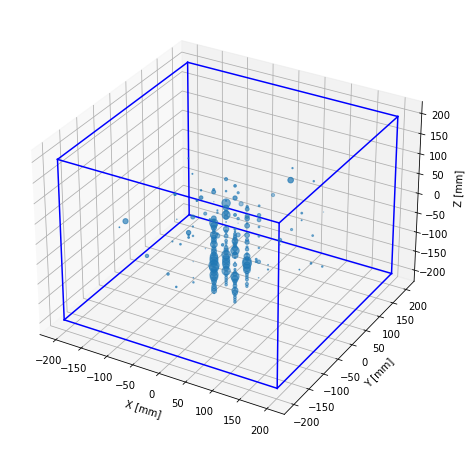

In [8]:
i = 10

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
ax.scatter(position[0, :], position[1, :], position[2, :], s=deposit[:, i] * 10)
xl = yl = 40.4 * 10 / 2
zl = (2 * 66 + 4 * 67) / 2
for s, e in combinations(np.array(list(product([-xl, xl], [-yl, yl], [-zl, zl]))), 2):
    if ((s - e) == 0).sum() == 2:
        ax.plot3D(*zip(s, e), color='b')
ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')

plt.show()